<a href="https://colab.research.google.com/github/mmartigani/MachineLearning1/blob/main/ML21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
#SVM
from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [6]:
digits=load_digits()

In [8]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [9]:
digits.feature_names

['pixel_0_0',
 'pixel_0_1',
 'pixel_0_2',
 'pixel_0_3',
 'pixel_0_4',
 'pixel_0_5',
 'pixel_0_6',
 'pixel_0_7',
 'pixel_1_0',
 'pixel_1_1',
 'pixel_1_2',
 'pixel_1_3',
 'pixel_1_4',
 'pixel_1_5',
 'pixel_1_6',
 'pixel_1_7',
 'pixel_2_0',
 'pixel_2_1',
 'pixel_2_2',
 'pixel_2_3',
 'pixel_2_4',
 'pixel_2_5',
 'pixel_2_6',
 'pixel_2_7',
 'pixel_3_0',
 'pixel_3_1',
 'pixel_3_2',
 'pixel_3_3',
 'pixel_3_4',
 'pixel_3_5',
 'pixel_3_6',
 'pixel_3_7',
 'pixel_4_0',
 'pixel_4_1',
 'pixel_4_2',
 'pixel_4_3',
 'pixel_4_4',
 'pixel_4_5',
 'pixel_4_6',
 'pixel_4_7',
 'pixel_5_0',
 'pixel_5_1',
 'pixel_5_2',
 'pixel_5_3',
 'pixel_5_4',
 'pixel_5_5',
 'pixel_5_6',
 'pixel_5_7',
 'pixel_6_0',
 'pixel_6_1',
 'pixel_6_2',
 'pixel_6_3',
 'pixel_6_4',
 'pixel_6_5',
 'pixel_6_6',
 'pixel_6_7',
 'pixel_7_0',
 'pixel_7_1',
 'pixel_7_2',
 'pixel_7_3',
 'pixel_7_4',
 'pixel_7_5',
 'pixel_7_6',
 'pixel_7_7']

In [10]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [11]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [12]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [13]:
image_and_labels = list(zip(digits.images, digits.target))

In [14]:
image_and_labels

[(array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
         [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
         [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
         [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
         [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
         [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
         [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
         [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]]),
  0),
 (array([[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.],
         [ 0.,  0.,  0., 11., 16.,  9.,  0.,  0.],
         [ 0.,  0.,  3., 15., 16.,  6.,  0.,  0.],
         [ 0.,  7., 15., 16., 16.,  2.,  0.,  0.],
         [ 0.,  0.,  1., 16., 16.,  3.,  0.,  0.],
         [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
         [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
         [ 0.,  0.,  0., 11., 16., 10.,  0.,  0.]]),
  1),
 (array([[ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.],
         [ 0.,  0.,  3., 16., 15., 14.,  0.,  0.],
         [ 0.,  0.,  8., 13.,  8., 16.,  0.,  0.],
         [ 0., 

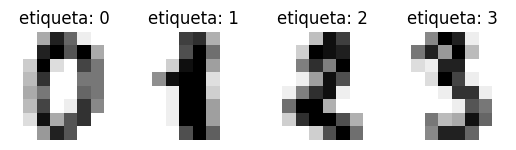

In [19]:
fig,axes=plt.subplots(1,4)
for ax,(image,label) in zip(axes,image_and_labels[0:4]):
  ax.set_axis_off()
  ax.imshow(image, cmap=plt.cm.gray_r)
  ax.set_title("etiqueta: %i" %label)

In [20]:
classifier = SVC(gamma=0.001)

In [21]:
digits.images.shape

(1797, 8, 8)

In [22]:
n_samples = digits.images.shape[0]
n_samples

1797

In [23]:
data_res=digits.images.reshape(n_samples, -1)

In [24]:
data_res.shape

(1797, 64)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(data_res,digits.target,test_size=0.5,shuffle=False)

In [26]:
classifier.fit(X_train, y_train)

SVC(gamma=0.001)

In [29]:
predictions =classifier.predict(X_test)

In [30]:
X_test_res=X_test.reshape(len(X_test), digits.images.shape[1],digits.images.shape[2])
X_test_res

array([[[ 0.,  0.,  1., ..., 15.,  3.,  0.],
        [ 0.,  1., 13., ..., 16.,  8.,  0.],
        [ 0.,  8., 16., ..., 16.,  5.,  0.],
        ...,
        [ 0.,  0.,  0., ..., 16.,  6.,  0.],
        [ 0.,  0.,  0., ..., 16.,  7.,  0.],
        [ 0.,  0.,  0., ..., 12.,  1.,  0.]],

       [[ 0.,  0.,  6., ...,  5.,  0.,  0.],
        [ 0.,  2., 16., ...,  7.,  0.,  0.],
        [ 0.,  2., 15., ...,  2.,  0.,  0.],
        ...,
        [ 0.,  1., 16., ..., 16.,  7.,  0.],
        [ 0.,  0., 10., ..., 15.,  3.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ...,  1.,  0.,  0.],
        [ 0.,  0.,  7., ...,  0.,  0.,  0.],
        ...,
        [ 1., 16., 14., ..., 16.,  3.,  0.],
        [ 0., 10., 12., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ...,  2.,  0.,  0.]],

       ...,

       [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ...,  2.,  1.,  0.],
        [ 0.,  0., 16., ..., 16.,  5.,  0.

In [31]:
images_and_pred=list(zip(X_test_res,predictions))

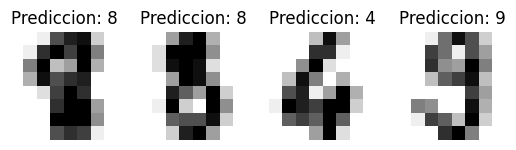

In [36]:
fig,axes=plt.subplots(1,4)
for ax,(image,predictions) in zip(axes,images_and_pred[0:4]):
  ax.set_axis_off()
  ax.imshow(image, cmap=plt.cm.gray_r)
  ax.set_title("Prediccion: %i" % predictions)